In [ ]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.12.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.12.0


In [ ]:
!pip install tensorflow==2.10.0



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 79.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflo

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.10.0'

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/plant_village",
                                                    shuffle =True,
                                                    image_size= (IMAGE_SIZE, IMAGE_SIZE),
                                                    batch_size= BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names

In [ ]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)

68

In [ ]:
import matplotlib.pyplot as plt

(32, 256, 256, 3)
[0 0 0 0 1 1 0 0 0 1 1 2 0 0 0 0 0 0 1 1 2 1 0 2 0 1 1 1 0 1 0 1]


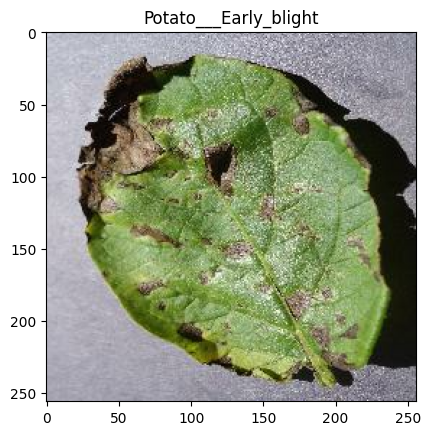

In [ ]:
for image , label_batch in dataset.take(1):
  plt.imshow(image[0].numpy().astype('uint8'))
  plt.title(class_names[label_batch[0]])
  print(image.shape)
  print(label_batch.numpy())


In [ ]:
def divide(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_buffer = 200):
  ds_lenght = len(ds)
  if(shuffle):
    ds = ds.shuffle(200)

  train_ratio = int(ds_lenght * train_split)
  val_ratio = int(ds_lenght * val_split)

  train_ds = ds.take(train_ratio)
  val_ds = ds.skip(train_ratio).take(val_ratio)
  test_ds = ds.skip(train_ratio).skip(val_ratio)

  return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = divide(dataset)

In [ ]:
len(test_ds)


8

In [ ]:
resizing_rescaling = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
from tensorflow.keras import layers

In [ ]:

model = tf.keras.models.Sequential([
resizing_rescaling,
data_augmentation,
layers.Conv2D(32, (3,3), activation='relu', input_shape = (IMAGE_SIZE,IMAGE_SIZE)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, kernel_size = (3,3), activation="relu"),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers. Flatten(),
layers. Dense(64, activation='relu'),
layers.Dense(len(class_names), activation='softmax'),
])

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
    metrics = ['accuracy']
)

In [ ]:
model.fit(train_ds, epochs = 12, batch_size = BATCH_SIZE, validation_data = val_ds)

Epoch 1/12
54/54 [==============================] - 18s 219ms/step - loss: 0.1628 - accuracy: 0.9396 - val_loss: 0.1893 - val_accuracy: 0.9107
Epoch 2/12
54/54 [==============================] - 15s 224ms/step - loss: 0.1568 - accuracy: 0.9419 - val_loss: 0.2234 - val_accuracy: 0.9226
Epoch 3/12
54/54 [==============================] - 15s 220ms/step - loss: 0.1227 - accuracy: 0.9531 - val_loss: 0.1721 - val_accuracy: 0.9427
Epoch 4/12
54/54 [==============================] - 15s 193ms/step - loss: 0.1479 - accuracy: 0.9454 - val_loss: 0.2132 - val_accuracy: 0.9115
Epoch 5/12
54/54 [==============================] - 15s 205ms/step - loss: 0.1298 - accuracy: 0.9419 - val_loss: 0.1647 - val_accuracy: 0.9345
Epoch 6/12
54/54 [==============================] - 16s 218ms/step - loss: 0.1185 - accuracy: 0.9577 - val_loss: 0.2440 - val_accuracy: 0.9115
Epoch 7/12
54/54 [==============================] - 15s 213ms/step - loss: 0.1755 - accuracy: 0.9261 - val_loss: 0.2161 - val_accuracy: 0.8958

In [ ]:
model.evaluate(test_ds)

8/8 [==============================] - 5s 43ms/step - loss: 0.1374 - accuracy: 0.9570


[0.13742655515670776, 0.95703125]

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

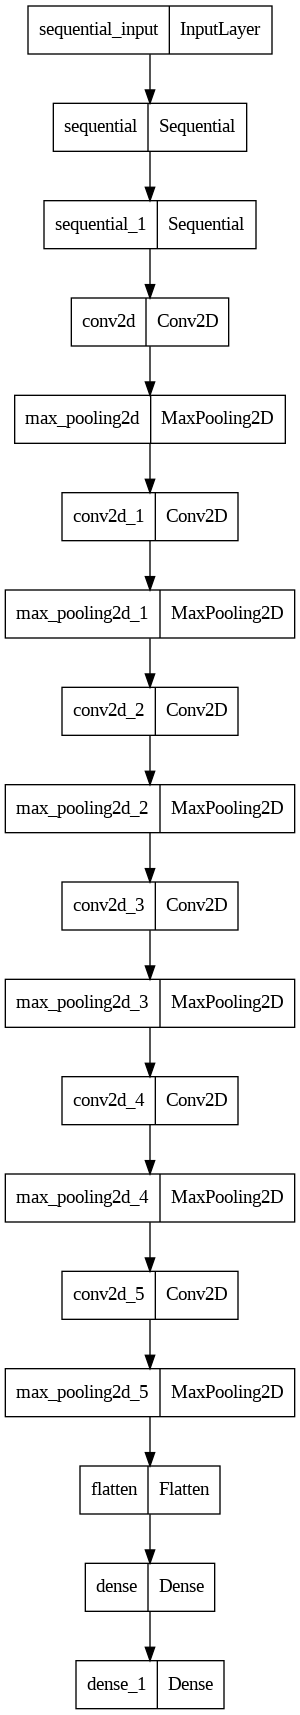

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
model.save("/content/drive/MyDrive/models/h5/model(2.0).h5")